In [1]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from scipy.misc import imread, imsave

### Problem 1

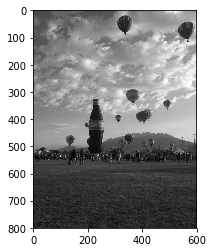

In [2]:
picture = imread('balloon.jpg', flatten=True) * 1/255
plt.imshow(picture, cmap=cm.gray)
plt.show()

In [8]:
sig = 0.1
lmbda = 0.25
g = lambda x : np.exp(-x**2/sig**2)

def anisdiff_bw(U, N, lmbda, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    R = np.hstack((U[:,0].reshape(-1,1),U,U[:,-1].reshape(-1,1)))
    S = np.vstack((R[0,:].reshape(1,-1),R,R[-1,:].reshape(1,-1)))
    U = S
    for i in range(N) :
        U[1:-1,1:-1] = U[1:-1,1:-1] + lmbda * ( g(np.abs(U[:-2,1:-1] - U[1:-1,1:-1]))*(U[:-2,1:-1] - U[1:-1,1:-1])
                                              + g(np.abs(U[2:,1:-1] - U[1:-1,1:-1]))*(U[2:,1:-1] - U[1:-1,1:-1]) 
                                              + g(np.abs(U[1:-1,:-2] - U[1:-1,1:-1]))*(U[1:-1,:-2] - U[1:-1,1:-1])
                                              + g(np.abs(U[1:-1,2:] - U[1:-1,1:-1]))*(U[1:-1,2:] - U[1:-1,1:-1]))
        U[0,:] = U[1,:]
        U[-1,:] = U[-2,:]
        U[:,0] = U[:,1]
        U[:,-1] = U[:,-2]
    return U[1:-1,1:-1]

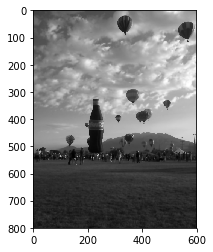

In [4]:
U = anisdiff_bw(picture, 5, lmbda, g)
plt.imshow(U, cmap=cm.gray)
plt.show()

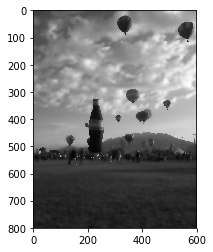

In [5]:
U = anisdiff_bw(picture, 20, lmbda, g)
plt.imshow(U, cmap=cm.gray)
plt.show()

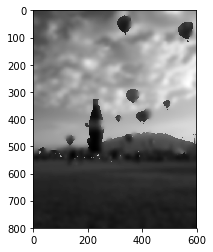

In [6]:
U = anisdiff_bw(picture, 100, lmbda, g)
plt.imshow(U, cmap=cm.gray)
plt.show()

### Problem 2

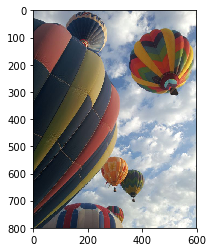

In [2]:
picture_2 = imread('balloons_color.jpg') * 1/255
plt.imshow(picture_2)
plt.show()

In [3]:
norm = lambda x : np.sqrt(np.sum(x**2, axis=2, keepdims=True))

sig = 0.1
lmbda = 0.25
g = lambda x : np.exp(-x**2/sig**2)

def anisdiff_color(U, N, lmbda, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    R = np.hstack((U[:,0,:].reshape(-1,1,3),U,U[:,-1,:].reshape(-1,1,3)))
    S = np.vstack((R[0,:,:].reshape(1,-1,3),R,R[-1,:,:].reshape(1,-1,3)))
    U = S
    for i in range(N) :
        U[1:-1,1:-1,:] = U[1:-1,1:-1,:] + lmbda * ( g(norm(U[:-2,1:-1,:] - U[1:-1,1:-1,:]))*(U[:-2,1:-1,:] - U[1:-1,1:-1,:])
                                              + g(norm(U[2:,1:-1,:] - U[1:-1,1:-1,:]))*(U[2:,1:-1,:] - U[1:-1,1:-1,:]) 
                                              + g(norm(U[1:-1,:-2,:] - U[1:-1,1:-1,:]))*(U[1:-1,:-2,:] - U[1:-1,1:-1,:])
                                              + g(norm(U[1:-1,2:,:] - U[1:-1,1:-1,:]))*(U[1:-1,2:,:] - U[1:-1,1:-1,:]))
        U[0,:,:] = U[1,:,:]
        U[-1,:,:] = U[-2,:,:]
        U[:,0,:] = U[:,1,:]
        U[:,-1,:] = U[:,-2,:]
    return U[1:-1,1:-1,:]

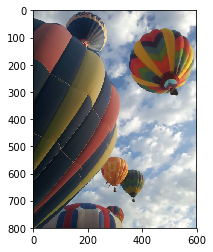

In [4]:
U = anisdiff_color(picture_2, 5, lmbda, g)
plt.imshow(U)
plt.show()

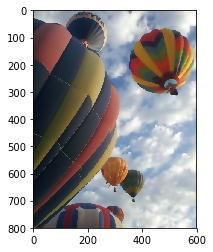

In [5]:
U = anisdiff_color(picture_2, 20, lmbda, g)
plt.imshow(U)
plt.show()

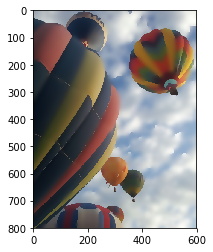

In [6]:
U = anisdiff_color(picture_2, 100, lmbda, g)
plt.imshow(U)
plt.show()

### Problem 3

In [13]:
image = imread('balloon.jpg', flatten=True)
image_orig = np.copy(image)
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)
image = image * 1/255
    
sig = 0.1
lmbda = 0.25
N = 20
g = lambda x : np.exp(-x**2/sig**2)

image_anis = anisdiff_bw(image, N, lmbda, g)

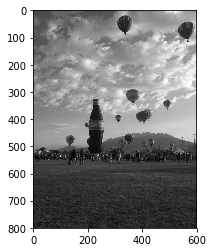

In [14]:
plt.imshow(image_orig, cmap=cm.gray)
plt.show()

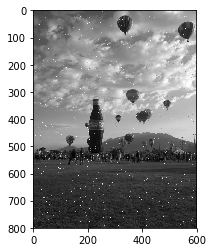

In [15]:
plt.imshow(image, cmap=cm.gray)
plt.show()

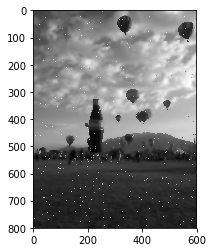

In [16]:
plt.imshow(image_anis, cmap=cm.gray)
plt.show()

The reason anisotropic diffusion doesn't smooth out the noise in the image is because the white dots are a stark contrast to their surroundings, and so the blurring of anisotropic diffusion treats the dots as separate things that need their boundaries preserved.